# Text Analytics
by Chris North, Virginia Tech

Topics: Bag of words, Sentiment analysis, Vector space model, TF-IDF, Cosine similarity

Datasets:  VT_Tweets, stop-word-list.txt, positive.txt, negative.txt

## Analyzing text documents
* https://en.wikipedia.org/wiki/Text_mining
* Data = set of textual documents
* Tasks = ...?

### Application Examples:
* Tag clouds
* Co-occurrence
* Clusters & DR plots
* Similarity & Nearest neighbors
* Filtering
* Relating sentiment to words, categories, ratings
* Term timelines
* Modeling events


## Bag-of-Words model of a document

* http://en.wikipedia.org/wiki/Bag-of-words_model
* Document = **Bag** of words (unordered list)
* Vocabulary = **Set** of unique words in the bag

1. Parse and clean words
2. Filter words
3. Count words

Example:  What are people tweeting about at VT?

In [1]:
###
import pandas
data = pandas.read_csv('data/VT_tweets_2019_geo.csv')

In [2]:
data.shape

(81911, 6)

In [3]:
data.head()

,tweet,username,datetime,latitude,longitude,id
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664


### 1. Parse and clean

* whitespace
* punctuation, non-alpha
* case sensitivity
* stemming


In [4]:
text = ' '.join(data.tweet)
len(text)

8814717

In [5]:
text[:2000]

'Calling all undergraduates interested in summer research! Need funding?! Apply today! https://t.co/2Uq2VsIDKA @RATBABY_ Marisa has to pay for her rampant theft but I think this is going too far @djmouritzen @SasQuach_8 Well there\'s only one logical solution now...change your flight destination to Roanoke and come on home. ✈️ 🦃 https://t.co/cpPtcc1FYA @therealdcunna Yes to*. Thank you David I turned 24.5 yesterday :/ RT @VaTechJobs: Now Hiring - Radiologic Technologist https://t.co/KpfqdOkA4Y so proud of you dad!! ready for football season❤️ @VanceVice https://t.co/s3uV3es0mV RT @svyantek: I wonder if her wheelchair will fit into the Dreamhouse? "Share a Smile Becky" was discontinued basically because she literal… RT @DanielBreslau: Another measure of the colonization of higher ed by corporate culture - self-congratulatory tech fantasies of Jeremy Rif… @PaulVWags Yeah, I lost it when my daughter revealed the name to me.  Very emotional, but absolutely perfect! If all cops had this lev

In [6]:
text = text.replace('!', '').replace('.', '').replace('?', '').replace(',', '')
text[:2000]

'Calling all undergraduates interested in summer research Need funding Apply today https://tco/2Uq2VsIDKA @RATBABY_ Marisa has to pay for her rampant theft but I think this is going too far @djmouritzen @SasQuach_8 Well there\'s only one logical solution nowchange your flight destination to Roanoke and come on home ✈️ 🦃 https://tco/cpPtcc1FYA @therealdcunna Yes to* Thank you David I turned 245 yesterday :/ RT @VaTechJobs: Now Hiring - Radiologic Technologist https://tco/KpfqdOkA4Y so proud of you dad ready for football season❤️ @VanceVice https://tco/s3uV3es0mV RT @svyantek: I wonder if her wheelchair will fit into the Dreamhouse "Share a Smile Becky" was discontinued basically because she literal… RT @DanielBreslau: Another measure of the colonization of higher ed by corporate culture - self-congratulatory tech fantasies of Jeremy Rif… @PaulVWags Yeah I lost it when my daughter revealed the name to me  Very emotional but absolutely perfect If all cops had this level of composure tho &

In [7]:
text = text.lower()
text[:2000]

'calling all undergraduates interested in summer research need funding apply today https://tco/2uq2vsidka @ratbaby_ marisa has to pay for her rampant theft but i think this is going too far @djmouritzen @sasquach_8 well there\'s only one logical solution nowchange your flight destination to roanoke and come on home ✈️ 🦃 https://tco/cpptcc1fya @therealdcunna yes to* thank you david i turned 245 yesterday :/ rt @vatechjobs: now hiring - radiologic technologist https://tco/kpfqdoka4y so proud of you dad ready for football season❤️ @vancevice https://tco/s3uv3es0mv rt @svyantek: i wonder if her wheelchair will fit into the dreamhouse "share a smile becky" was discontinued basically because she literal… rt @danielbreslau: another measure of the colonization of higher ed by corporate culture - self-congratulatory tech fantasies of jeremy rif… @paulvwags yeah i lost it when my daughter revealed the name to me  very emotional but absolutely perfect if all cops had this level of composure tho &

In [8]:
bag = text.split()

In [9]:
bag[:20]

['calling',
 'all',
 'undergraduates',
 'interested',
 'in',
 'summer',
 'research',
 'need',
 'funding',
 'apply',
 'today',
 'https://tco/2uq2vsidka',
 '@ratbaby_',
 'marisa',
 'has',
 'to',
 'pay',
 'for',
 'her',
 'rampant']

In [10]:
len(bag)

1327001

In [11]:
len(set(bag))

104739

### 2. Filter

* remove "stop" words
* select useful words

Example: hashtags

In [12]:
hashs = [w for w in bag if w.startswith('#')]

In [13]:
len(hashs)

28697

In [14]:
hashs[:100]

['#22',
 '#hokies🦃',
 '#futureleaders',
 '#hgtvhometown',
 '#wahoowa',
 '#robotandrew:',
 '#spc',
 '#razzledazzle',
 '#darwinday2019',
 '#skillsusa',
 '#nooneleavesemptyhanded',
 '#animals',
 '#wildlife',
 '#wallart',
 '#newrivernature',
 '#photography',
 '#hokies',
 '#womenindata',
 '#culturematters',
 '#vibrantvirginia',
 '#hrva',
 '#newportnews',
 '#econdev',
 '#robotandrew:',
 '#hokies',
 '#womeninstem',
 '#cmonman',
 '#iwillbookthatbet',
 '#womeninstem',
 '#baseball',
 '#tigers',
 '#birds',
 '#nature',
 '#birdart',
 '#wallart',
 '#newrivernature',
 '#nikonphotography',
 '#birdphotography',
 '#ifbealestreetcouldtalk',
 '#wallart',
 '#canvasprints',
 '#beverleystreet',
 '#streetscene',
 '#stauntonva',
 '#vi…',
 '#nationalinventorsday',
 '#3dprinting',
 '#stem',
 '#vr',
 '#vauquois',
 '#nationalinventorsday',
 '#aws',
 '#cloudformation',
 '#cloudwatch',
 '#lambda',
 '#aws',
 '#cloudformation',
 '#cloud…',
 '#aws',
 '#cloudformation',
 '#cloud…',
 '#hokies',
 '#hokies',
 '#hokies',
 '

### 3. Count

* compute vocabulary terms
* compute vocabulary term frequencies

Word frequency is a common measure in text analytics, e.g. sentiment analysis, etc.


In [15]:
vocab = list(set(hashs))

In [16]:
len(vocab)

5301

In [17]:
sorted(vocab)[:100]

['#',
 '##biotech',
 '##birdprints',
 "#'s",
 '#0',
 '#00',
 '#002',
 '#1',
 '#1"',
 '#1)',
 '#1-0',
 '#1-16',
 '#1-4',
 '#10',
 '#100',
 '#100daysofcode',
 '#100daysofmlcode',
 '#104',
 '#1095days',
 '#11',
 '#116',
 '#12',
 '#13',
 '#130',
 '#14',
 '#15',
 '#15/16',
 '#15straight',
 '#15straight🏆',
 '#15yearsinarow💪🏽💯',
 '#15yearsi…',
 '#16',
 '#16:',
 '#16straight',
 '#17:',
 '#18',
 '#18-758):',
 '#1835',
 '#18:',
 '#1912',
 '#1920',
 '#1943',
 '#19:',
 '#19cooper:',
 '#1:',
 '#1dayout',
 '#1year…',
 '#1️⃣',
 '#2',
 '#2)',
 '#20',
 '#2004',
 '#2010',
 '#2013',
 '#2016election',
 '#2019ing',
 '#2019mmm',
 '#2019problems',
 '#2019sfs',
 '#2019sot',
 '#2019so…',
 '#2019tournamentchamps',
 '#2020nationalchamps',
 '#20:',
 '#21',
 '#21:',
 '#22',
 '#22virginiatech',
 '#23andtea',
 '#23sisters',
 '#24',
 '#24:',
 '#25',
 '#25:',
 '#25thamendmentnow',
 '#26:',
 '#27-1',
 '#27:',
 '#28-1',
 '#28:',
 '#29',
 '#29-1',
 '#29:',
 '#2:',
 '#2daysout',
 '#2ndcareernurse',
 '#2wolves1sheep',
 '#3

In [18]:
freq = pandas.DataFrame([(w, hashs.count(w)) for w in vocab], columns=['hash', 'freq'])
freq

,hash,freq
0,#immunometabolism,2
1,#smile,1
2,#intothefield,6
3,#ctemonth2019,3
4,#samanthafish,1
...,...,...
5296,#humanresources,10
5297,#lt,2
5298,#kawaiipet,1
5299,#gospel,1


In [19]:
freq.sort_values('freq', ascending=False)[:20]

,hash,freq
1220,#hokies,3861
945,#vtgivingday,1434
1674,#getbetter,557
988,#wallart,461
4549,#newrivernature,427
1630,#blacksburg,402
5189,#virginiatech,320
3238,#hokies🦃,316
1034,#art,313
4076,#nature,310


### Bag of Words for multiple documents

Can store bags in DataFrame cells.

In [20]:
data.head()

,tweet,username,datetime,latitude,longitude,id
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664


In [21]:
data['bag'] = data.tweet.map(lambda t: t.replace('!', '').replace('.', '').lower().split())
data

,tweet,username,datetime,latitude,longitude,id,bag
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568,"[calling, all, undergraduates, interested, in,..."
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697,"[@ratbaby_, marisa, has, to, pay, for, her, ra..."
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834,"[@djmouritzen, @sasquach_8, well, there's, onl..."
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112,"[@therealdcunna, yes, to*, thank, you, david]"
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664,"[i, turned, 245, yesterday, :/]"
...,...,...,...,...,...,...,...
81906,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",SharifNabhan,2019-03-22 01:48:34,0.0,0.0,1108908295941693440,"[rt, @teamcoachbuzz:, from, ‘90-‘92,, i, was, ..."
81907,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",HoopBoys17,2019-03-22 01:48:41,0.0,0.0,1108908325394173952,"[rt, @teamcoachbuzz:, from, ‘90-‘92,, i, was, ..."
81908,@NRVLiving @lmsedlak @timwitten @BlacksburgPub...,bedmison,2019-03-22 01:49:07,0.0,0.0,1108908432432791552,"[@nrvliving, @lmsedlak, @timwitten, @blacksbur..."
81909,Ya think? Naw. DT lied? https://t.co/2PgCYrOIdm,AFranklin64,2019-03-22 01:49:12,0.0,0.0,1108908453924405248,"[ya, think?, naw, dt, lied?, https://tco/2pgcy..."


In [22]:
data['len'] = data.bag.map(len)
data

,tweet,username,datetime,latitude,longitude,id,bag,len
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568,"[calling, all, undergraduates, interested, in,...",12
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697,"[@ratbaby_, marisa, has, to, pay, for, her, ra...",17
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834,"[@djmouritzen, @sasquach_8, well, there's, onl...",21
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112,"[@therealdcunna, yes, to*, thank, you, david]",6
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664,"[i, turned, 245, yesterday, :/]",5
...,...,...,...,...,...,...,...,...
81906,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",SharifNabhan,2019-03-22 01:48:34,0.0,0.0,1108908295941693440,"[rt, @teamcoachbuzz:, from, ‘90-‘92,, i, was, ...",22
81907,"RT @TeamCoachBuzz: From ‘90-‘92, I was a below...",HoopBoys17,2019-03-22 01:48:41,0.0,0.0,1108908325394173952,"[rt, @teamcoachbuzz:, from, ‘90-‘92,, i, was, ...",22
81908,@NRVLiving @lmsedlak @timwitten @BlacksburgPub...,bedmison,2019-03-22 01:49:07,0.0,0.0,1108908432432791552,"[@nrvliving, @lmsedlak, @timwitten, @blacksbur...",34
81909,Ya think? Naw. DT lied? https://t.co/2PgCYrOIdm,AFranklin64,2019-03-22 01:49:12,0.0,0.0,1108908453924405248,"[ya, think?, naw, dt, lied?, https://tco/2pgcy...",6


In [23]:
data.len.max()

64

In [24]:
data.len.idxmax()

49786

In [25]:
data.tweet[data.len.idxmax()]

"@worldviewconvos Wouldn't that depend on the content of the actual classes?  It's not like  Matt 25, Luke 14, Acts 2, Acts 4, Acts 6, Acts 15, Rom 3, Rom 12, I Cor 1, Ii Cor 6, Eph 2, Eph 6, I Thes 4, I Tim 6, Jam 2, Rev 2-3 aren't in the Bible, just to name a few texts which touch on these."

In [26]:
data['hash'] = data.bag.map(lambda b: [w for w in b if w.startswith('#')])
data[:30]

,tweet,username,datetime,latitude,longitude,id,bag,len,hash
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568,"[calling, all, undergraduates, interested, in,...",12,[]
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697,"[@ratbaby_, marisa, has, to, pay, for, her, ra...",17,[]
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834,"[@djmouritzen, @sasquach_8, well, there's, onl...",21,[]
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112,"[@therealdcunna, yes, to*, thank, you, david]",6,[]
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664,"[i, turned, 245, yesterday, :/]",5,[]
5,RT @VaTechJobs: Now Hiring - Radiologic Techno...,CougarTrainee,2019-02-11 21:57:08,0.0,0.0,1095079314201214977,"[rt, @vatechjobs:, now, hiring, -, radiologic,...",8,[]
6,so proud of you dad!! ready for football seaso...,ViceSavannah,2019-02-11 22:03:25,0.0,0.0,1095080895399251968,"[so, proud, of, you, dad, ready, for, football...",11,[]
7,RT @svyantek: I wonder if her wheelchair will ...,trisgilla,2019-02-11 22:09:41,0.0,0.0,1095082473438961666,"[rt, @svyantek:, i, wonder, if, her, wheelchai...",22,[]
8,RT @DanielBreslau: Another measure of the colo...,STS_News,2019-02-11 22:30:47,0.0,0.0,1095087781062295552,"[rt, @danielbreslau:, another, measure, of, th...",20,[]
9,"@PaulVWags Yeah, I lost it when my daughter re...",bhsfbradio,2019-02-11 22:32:59,0.0,0.0,1095088336874680320,"[@paulvwags, yeah,, i, lost, it, when, my, dau...",18,[]


## Sentiment Analysis

* https://en.wikipedia.org/wiki/Sentiment_analysis 
* http://hedonometer.org/index.html
* Count positive and negative words
    * Standard word dictionaries 
    * How to efficiently test membership in a word dictionary?
    

In [27]:
len(bag)

1327001

In [28]:
bag[:20]

['calling',
 'all',
 'undergraduates',
 'interested',
 'in',
 'summer',
 'research',
 'need',
 'funding',
 'apply',
 'today',
 'https://tco/2uq2vsidka',
 '@ratbaby_',
 'marisa',
 'has',
 'to',
 'pay',
 'for',
 'her',
 'rampant']

In [29]:
###
positives = set(open('data/positive.txt').read().split())
negatives = set(open('data/negative.txt').read().split())

In [30]:
p = [w for w in bag if w in positives]
p[:10]

['interested',
 'well',
 'logical',
 'proud',
 'ready',
 'will',
 'fit',
 'smile',
 'perfect',
 'dear']

In [31]:
n = [w for w in bag if w in negatives]
n[:10]

['need',
 'rampant',
 'lost',
 'emotional',
 'need',
 'addiction',
 'bad',
 'drastically',
 'decrease',
 'collapse']

In [32]:
len(p), len(n)

(56144, 26636)

In [33]:
len(p) - len(n)

29508

## Vector Space Model of a set of documents

* https://en.wikipedia.org/wiki/Vector_space_model 
* Vocabulary = list of unique terms (words) in document set
    * bag of words, n-grams, extracted entities, ...
* Document = vector of vocabulary term frequencies
* Set of documents = matrix
* Term Frequency matrix TF (Doc x Term):
    * rows = documents
    * columns = terms in vocabulary
    * values = term frequency in document
* $\textrm{TF}_{d,t} = d.\textrm{bag_of_words}.\textrm{count}(t)$
    * $d$ = document
    * $t$ = term


doc_1 = "hokies, go hokies"

doc_2 = "hokies beat duke"

TF matrix = 

| docID | hokies | go | beat | duke |
| --- | --- | --- | --- | --- |
| doc_1 | 2 | 1 | 0 | 0 |
| doc_2 | 1 | 0 | 1 | 1 |

In [34]:
data[:30]

,tweet,username,datetime,latitude,longitude,id,bag,len,hash
0,Calling all undergraduates interested in summe...,OurVt,2019-02-11 20:48:07,0.0,0.0,1095061945810669568,"[calling, all, undergraduates, interested, in,...",12,[]
1,@RATBABY_ Marisa has to pay for her rampant th...,BillySmilesXXL,2019-02-11 20:50:05,0.0,0.0,1095062439023005697,"[@ratbaby_, marisa, has, to, pay, for, her, ra...",17,[]
2,@djmouritzen @SasQuach_8 Well there's only one...,virginia_tech,2019-02-11 21:21:07,0.0,0.0,1095070250473848834,"[@djmouritzen, @sasquach_8, well, there's, onl...",21,[]
3,@therealdcunna Yes to*. Thank you David,CassellGuardVT,2019-02-11 21:26:36,0.0,0.0,1095071630257242112,"[@therealdcunna, yes, to*, thank, you, david]",6,[]
4,I turned 24.5 yesterday :/,vic_takes_twitr,2019-02-11 21:29:36,0.0,0.0,1095072383470321664,"[i, turned, 245, yesterday, :/]",5,[]
5,RT @VaTechJobs: Now Hiring - Radiologic Techno...,CougarTrainee,2019-02-11 21:57:08,0.0,0.0,1095079314201214977,"[rt, @vatechjobs:, now, hiring, -, radiologic,...",8,[]
6,so proud of you dad!! ready for football seaso...,ViceSavannah,2019-02-11 22:03:25,0.0,0.0,1095080895399251968,"[so, proud, of, you, dad, ready, for, football...",11,[]
7,RT @svyantek: I wonder if her wheelchair will ...,trisgilla,2019-02-11 22:09:41,0.0,0.0,1095082473438961666,"[rt, @svyantek:, i, wonder, if, her, wheelchai...",22,[]
8,RT @DanielBreslau: Another measure of the colo...,STS_News,2019-02-11 22:30:47,0.0,0.0,1095087781062295552,"[rt, @danielbreslau:, another, measure, of, th...",20,[]
9,"@PaulVWags Yeah, I lost it when my daughter re...",bhsfbradio,2019-02-11 22:32:59,0.0,0.0,1095088336874680320,"[@paulvwags, yeah,, i, lost, it, when, my, dau...",18,[]


In [35]:
data.shape

(81911, 9)

### Document aggregation first

Tweets produce a sparse TF matrix.  Group many tweets to make more interesting documents, eg. by day, username, etc.  Bags-of-words can be concatenated to make bigger bags.

In [36]:
g = data.groupby('username')
g.size()

username
001BLIZZ          22
01valleyhokie      4
0IvIeN             1
0L1V3RF0X          1
0bviouSquirre1     1
                  ..
zxczyjzxc          1
zxggy__            1
zymurginian        1
zzqqzzq            3
zzsmiller          1
Length: 18578, dtype: int64

In [37]:
userBags = g.bag.aggregate(lambda seriessofbags: [w for bag in seriessofbags for w in bag])
userBags

username
001BLIZZ          [@trapstarmgmt, 1, is, raw, @lord_farquuad, wt...
01valleyhokie     [rt, @vthokie_nation:, he, was, a, legacy, to,...
0IvIeN            [rt, @henryskutt:, any, kroger, parking, lot, ...
0L1V3RF0X         [rt, @lolofennec:, lucario, knows, of, your, s...
0bviouSquirre1    [rt, @whapavt:, unimpressed, jaguar, is, unimp...
                                        ...                        
zxczyjzxc         [rt, @virginia_tech:, leaving, school, on, a, ...
zxggy__           [rt, @dimesadozenn:, @_handsomefella, we, are,...
zymurginian       [drinking, an, a, moment, on, the, lips, by, @...
zzqqzzq           [rt, @kerrifar:, #artforsale, ~, "just, beachy...
zzsmiller         [rt, @tylergraff_1:, @zzsmiller, @roush149, @b...
Name: bag, Length: 18578, dtype: object

In [38]:
talkers = userBags[userBags.map(len) > 500]
talkers

username
1071PSK            [good, tuesday, morning, new, river, valley, m...
19mase19           [rt, @vtscoop247:, how, will, the, depth, char...
2010hokie          [rt, @virginia_tech:, all, of, our, hokies, ar...
24SloppySeconds    [@isaacklee, i, appreciate, the, lively, bante...
4HBappinRapper     [such, a, diverse, crowd, https://tco/fxheco6s...
                                         ...                        
whitney_davis4     [nice, job,, @vt_wgolfcoach, big, time, finish...
williambrannock    [y’all, i, think, pj, is, gonna, play, outlaw,...
writegud           [@eschauster, i’ve, reduced, my, ironing, time...
wxscope            [rt, @nwsblacksburg:, winds, are, whipping, ac...
z06vt1             [rt, @commonwlthcup:, virginia, tech, has, hel...
Name: bag, Length: 436, dtype: object

In [39]:
len(userBags), len(talkers)

(18578, 436)

### Compute the TF Matrix 

In [40]:
pandas.Series(talkers[0]).value_counts()

the                       56
to                        41
a                         39
morning                   32
and                       25
                          ..
aged                       1
5                          1
🤮                          1
what                       1
https://tco/mel0gzxlwx     1
Length: 415, dtype: int64

In [41]:
TF = talkers.apply(lambda talker: pandas.Series(talker).value_counts())
TF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,56.0,41.0,39.0,32.0,25.0,25.0,23.0,22.0,22.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19mase19,67.0,36.0,29.0,NaN,14.0,5.0,5.0,28.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010hokie,40.0,33.0,18.0,NaN,12.0,9.0,11.0,18.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24SloppySeconds,81.0,31.0,25.0,NaN,23.0,10.0,13.0,19.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4HBappinRapper,43.0,44.0,19.0,NaN,37.0,27.0,7.0,15.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,18.0,15.0,10.0,3.0,5.0,9.0,4.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
williambrannock,33.0,28.0,21.0,NaN,7.0,6.0,6.0,12.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writegud,141.0,84.0,76.0,NaN,55.0,31.0,29.0,41.0,8.0,3.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
TF.memory_usage(deep=True).sum()

285329724

## TFIDF

TFIDF == Term Frequency inverse Document Frequency

* https://en.wikipedia.org/wiki/Tf–idf 
* Goal: Normalize terms by their frequency across all documents, to emphasize discriminating terms and de-emphasize common terms.
* DF = Document Frequency vector: measures the number of documents each term appears in.
    * $\textrm{DF}_t = |\{i: \textrm{TF}_{i,t} > 0\}| = $ count non-zero entries in $\textrm{TF}_t$
    $ $
        * range \[1 - n\]   (why not 0?)
* IDF = Inverse Document Frequency vector: inverts DF
    * $\textrm{IDF}_t = \log \left( \frac{n}{\textrm{DF}_t} \right)$
        * $n$ = number of documents (or cardinality of TF)
        * $\textrm{DF}_t=1 \implies \textrm{IDF}_t=log(n)$
        * $\textrm{DF}_t=n \implies \textrm{IDF}_t=log(1)=0$
* TFIDF = matrix is computed from the TF matrix and the IDF vector
    * $\textrm{TFIDF}_{d,t} = \textrm{TF}_{d,t} * \textrm{IDF}_t$


doc_1 = "hokies, go hokies"

doc_2 = "hokies beat duke"

doc_3 = "weather is good"


TF matrix = 

| docID | hokies | go | beat | duke |
| --- | --- | --- | --- | --- |
| doc_1 | 2 | 1 | 0 | 0 |
| doc_2 | 1 | 0 | 1 | 1 |


DF = 

| hokies | go | beat | duke |
| --- | --- | --- | --- |
| 2 | 1 | 1 | 1 |

IDF = 

| hokies | go | beat | duke |
| --- | --- | --- | --- |
| 0 | 1 | 1 | 1 |

TFIDF matrix = 

| docID | hokies | go | beat | duke |
| --- | --- | --- | --- | --- |
| doc_1 | 0 | 1 | 0 | 0 |
| doc_2 | 0 | 0 | 1 | 1 |

In [43]:
TF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,56.0,41.0,39.0,32.0,25.0,25.0,23.0,22.0,22.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19mase19,67.0,36.0,29.0,NaN,14.0,5.0,5.0,28.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010hokie,40.0,33.0,18.0,NaN,12.0,9.0,11.0,18.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24SloppySeconds,81.0,31.0,25.0,NaN,23.0,10.0,13.0,19.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4HBappinRapper,43.0,44.0,19.0,NaN,37.0,27.0,7.0,15.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,18.0,15.0,10.0,3.0,5.0,9.0,4.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
williambrannock,33.0,28.0,21.0,NaN,7.0,6.0,6.0,12.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writegud,141.0,84.0,76.0,NaN,55.0,31.0,29.0,41.0,8.0,3.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
import numpy

## Compute IDF vector:  (count non-NaN)
DF = TF.count()
IDF = numpy.log(float(len(TF)) / DF)
IDF

the        0.013857
to         0.016185
a          0.020858
morning    1.341444
and        0.023203
             ...   
"vah       6.077642
@espn,     6.077642
tech",     6.077642
"vt",      6.077642
"tech"     6.077642
Length: 81790, dtype: float64

In [45]:
## compute TF-IDF matrix:
TFIDF = TF * IDF
TFIDF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,0.775994,0.663598,0.813471,42.926201,0.580072,1.905684,0.750649,0.562168,2.396563,9.754797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19mase19,0.928421,0.582672,0.604889,NaN,0.324841,0.381137,0.163185,0.715486,0.544673,1.393542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010hokie,0.554281,0.534116,0.375448,NaN,0.278435,0.686046,0.359006,0.459955,0.326804,0.464514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24SloppySeconds,1.122420,0.501745,0.521456,NaN,0.533667,0.762274,0.424280,0.485508,0.544673,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4HBappinRapper,0.595852,0.712154,0.396306,NaN,0.858507,2.058139,0.228459,0.383296,0.653608,0.464514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,0.249427,0.242780,0.208582,4.024331,0.116014,0.686046,0.130548,0.076659,0.435739,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
williambrannock,0.457282,0.453189,0.438023,NaN,0.162420,0.457364,0.195822,0.306637,0.544673,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writegud,1.953842,1.359567,1.585225,NaN,1.276159,2.363048,0.946471,1.047676,0.871477,1.393542,...,6.077642,6.077642,6.077642,6.077642,NaN,NaN,NaN,NaN,NaN,NaN


### What does IDF look like?

In [46]:
###
import numpy
d = pandas.DataFrame({'df':range(1,101)})
d['inv'] = 100/d.df
d['log'] = numpy.log(d.inv)*20
d

,df,inv,log
0,1,100.000000,92.103404
1,2,50.000000,78.240460
2,3,33.333333,70.131158
3,4,25.000000,64.377516
4,5,20.000000,59.914645
...,...,...,...
95,96,1.041667,0.816440
96,97,1.030928,0.609184
97,98,1.020408,0.404054
98,99,1.010101,0.201007


<AxesSubplot:>

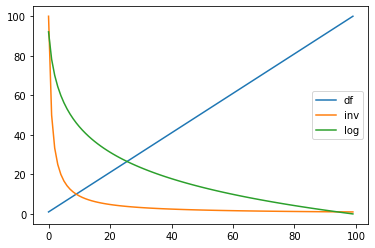

In [47]:
###
%matplotlib inline
d.plot()

## Cosine Similarity

* https://en.wikipedia.org/wiki/Cosine_similarity
* Are two document vectors pointed in the same direction, regardless of magnitude?
* Compare 2 documents, or compare a query to a document
    * similar = colinear vectors (not neccessarily distance=0)
    * not similar = orthogonal vectors (not neccessarily infinite distance)
    * efficiency for large and sparse VSM matrices
* $\textrm{similarity}(d,e) = \cos \theta(d,e) = \frac{d \cdot e}{|d||e|}$
    * vector magnitude:  $|d| = \sqrt{d \cdot d}$
    * dot product: $d \cdot e = \sum_i{d_i e_i}$
    * similarity range: \[0 - 1\] means \[orthogonal - colinear\]
    * distance = 1 - similarity
    * $\cos \theta(d,e) = \frac{d \cdot e}{|d||e|} = \frac{d}{|d|} \cdot \frac{e}{|e|}$
* Compute similarity matrix $S$ for TFIDF matrix $D$:
    1. $\widehat{D}$ = pre-normalize all docs in D by their magnitude: $\widehat{D}_{d,t} = \frac{D_{d,t}}{|D_d|}$
    2. $S = \widehat{D} \times \widehat{D}^T$




TFIDF matrix = 

| docID | hokies | go | beat | duke |
| --- | --- | --- | --- | --- |
| doc_1 | 0 | 1 | 0 | 0 |
| doc_2 | 0 | 0 | 1 | 1 |

document magnitudes =

| docID | Magnitude |
| --- | --- |
| doc_1 | 1 |
| doc_2 | 1.4 |


normalized TFIDF matrix = 

| docID | hokies | go | beat | duke |
| --- | --- | --- | --- | --- |
| doc_1 | 0 | 1 | 0 | 0 |
| doc_2 | 0 | 0 | 0.7 | 0.7 |

cos similarity matrix = 

|  | doc_1 | doc_2 |
| --- | --- | --- |
| doc_1 | 1 | 0 |
| doc_2 | 0 | 1 |

In [55]:
## Step 1: normalize documents to unit length

In [63]:
TFIDF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,0.775994,0.663598,0.813471,42.926201,0.580072,1.905684,0.750649,0.562168,2.396563,9.754797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19mase19,0.928421,0.582672,0.604889,NaN,0.324841,0.381137,0.163185,0.715486,0.544673,1.393542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010hokie,0.554281,0.534116,0.375448,NaN,0.278435,0.686046,0.359006,0.459955,0.326804,0.464514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24SloppySeconds,1.122420,0.501745,0.521456,NaN,0.533667,0.762274,0.424280,0.485508,0.544673,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4HBappinRapper,0.595852,0.712154,0.396306,NaN,0.858507,2.058139,0.228459,0.383296,0.653608,0.464514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,0.249427,0.242780,0.208582,4.024331,0.116014,0.686046,0.130548,0.076659,0.435739,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
williambrannock,0.457282,0.453189,0.438023,NaN,0.162420,0.457364,0.195822,0.306637,0.544673,0.929028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writegud,1.953842,1.359567,1.585225,NaN,1.276159,2.363048,0.946471,1.047676,0.871477,1.393542,...,6.077642,6.077642,6.077642,6.077642,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
docmags = numpy.sqrt((TFIDF * TFIDF).sum(axis=1))
docmags

username
1071PSK            187.341566
19mase19           129.130370
2010hokie          112.908917
24SloppySeconds    143.324443
4HBappinRapper     110.927829
                      ...    
whitney_davis4      90.968606
williambrannock     81.564548
writegud           165.286365
wxscope            117.084844
z06vt1             174.094858
Length: 436, dtype: float64

In [70]:
nTFIDF = TFIDF.divide(docmags, axis=0)
nTFIDF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,0.004142,0.003542,0.004342,0.229133,0.003096,0.010172,0.004007,0.003001,0.012792,0.052070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19mase19,0.007190,0.004512,0.004684,NaN,0.002516,0.002952,0.001264,0.005541,0.004218,0.010792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010hokie,0.004909,0.004731,0.003325,NaN,0.002466,0.006076,0.003180,0.004074,0.002894,0.004114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24SloppySeconds,0.007831,0.003501,0.003638,NaN,0.003723,0.005319,0.002960,0.003387,0.003800,0.006482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4HBappinRapper,0.005372,0.006420,0.003573,NaN,0.007739,0.018554,0.002060,0.003455,0.005892,0.004188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,0.002742,0.002669,0.002293,0.044239,0.001275,0.007542,0.001435,0.000843,0.004790,0.010213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
williambrannock,0.005606,0.005556,0.005370,NaN,0.001991,0.005607,0.002401,0.003759,0.006678,0.011390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writegud,0.011821,0.008226,0.009591,NaN,0.007721,0.014297,0.005726,0.006339,0.005273,0.008431,...,0.03677,0.03677,0.03677,0.03677,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
nTFIDF.fillna(0.0, inplace=True)
nTFIDF

,the,to,a,morning,and,you,on,in,have,good,...,hannity,door:,huh?”,https://tco/1u22oqbren,https://tco/shbsolxiz4,"""vah","@espn,","tech"",","""vt"",","""tech"""
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,0.004142,0.003542,0.004342,0.229133,0.003096,0.010172,0.004007,0.003001,0.012792,0.052070,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
19mase19,0.007190,0.004512,0.004684,0.000000,0.002516,0.002952,0.001264,0.005541,0.004218,0.010792,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2010hokie,0.004909,0.004731,0.003325,0.000000,0.002466,0.006076,0.003180,0.004074,0.002894,0.004114,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
24SloppySeconds,0.007831,0.003501,0.003638,0.000000,0.003723,0.005319,0.002960,0.003387,0.003800,0.006482,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4HBappinRapper,0.005372,0.006420,0.003573,0.000000,0.007739,0.018554,0.002060,0.003455,0.005892,0.004188,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,0.002742,0.002669,0.002293,0.044239,0.001275,0.007542,0.001435,0.000843,0.004790,0.010213,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
williambrannock,0.005606,0.005556,0.005370,0.000000,0.001991,0.005607,0.002401,0.003759,0.006678,0.011390,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
writegud,0.011821,0.008226,0.009591,0.000000,0.007721,0.014297,0.005726,0.006339,0.005273,0.008431,...,0.03677,0.03677,0.03677,0.03677,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [75]:
## Step 2:  matrix multiply
cosinm = nTFIDF.dot(nTFIDF.transpose())
cosinm

username,1071PSK,19mase19,2010hokie,24SloppySeconds,4HBappinRapper,660000_ff6600,AFranklin64,ARomanoWDBJ,ASAP__HAMS,AbdulmueenBogis,...,vtcarter,vtgeosciences,vthokie,vtnews,vtspes,whitney_davis4,williambrannock,writegud,wxscope,z06vt1
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,1.000000,0.025271,0.023149,0.011551,0.020311,0.013987,0.016101,0.040357,0.005714,0.000051,...,0.007295,0.013700,0.020528,0.013447,0.007339,0.027302,0.026520,0.032699,0.028958,0.002603
19mase19,0.025271,1.000000,0.325937,0.025408,0.068040,0.024727,0.026964,0.113410,0.005912,0.000734,...,0.012086,0.035882,0.069383,0.021005,0.018606,0.053265,0.182236,0.059398,0.036002,0.115913
2010hokie,0.023149,0.325937,1.000000,0.021935,0.063857,0.017837,0.023208,0.066084,0.007618,0.000815,...,0.013752,0.069735,0.051611,0.164846,0.061284,0.052867,0.127995,0.052841,0.040178,0.095572
24SloppySeconds,0.011551,0.025408,0.021935,1.000000,0.031204,0.040922,0.036343,0.034215,0.007490,0.000401,...,0.018642,0.017338,0.026311,0.016319,0.007739,0.018523,0.025875,0.056059,0.008367,0.001386
4HBappinRapper,0.020311,0.068040,0.063857,0.031204,1.000000,0.039469,0.058522,0.044078,0.013020,0.000268,...,0.023844,0.021042,0.046312,0.023878,0.010525,0.027497,0.064122,0.097841,0.014102,0.165695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,0.027302,0.053265,0.052867,0.018523,0.027497,0.015060,0.020431,0.032225,0.005174,0.000141,...,0.010345,0.017706,0.036137,0.009586,0.010634,1.000000,0.034572,0.039762,0.007613,0.007822
williambrannock,0.026520,0.182236,0.127995,0.025875,0.064122,0.029631,0.037602,0.105230,0.011288,0.000213,...,0.014161,0.021291,0.059988,0.019586,0.009587,0.034572,1.000000,0.086830,0.020391,0.091277
writegud,0.032699,0.059398,0.052841,0.056059,0.097841,0.066080,0.078435,0.082027,0.020848,0.000952,...,0.044577,0.029489,0.105950,0.044851,0.016298,0.039762,0.086830,1.000000,0.015029,0.034272


In [76]:
cosinm.max()

username
1071PSK            1.0
19mase19           1.0
2010hokie          1.0
24SloppySeconds    1.0
4HBappinRapper     1.0
                  ... 
whitney_davis4     1.0
williambrannock    1.0
writegud           1.0
wxscope            1.0
z06vt1             1.0
Length: 436, dtype: float64

In [79]:
cosinm2 = cosinm - numpy.identity(len(cosinm))
cosinm2

username,1071PSK,19mase19,2010hokie,24SloppySeconds,4HBappinRapper,660000_ff6600,AFranklin64,ARomanoWDBJ,ASAP__HAMS,AbdulmueenBogis,...,vtcarter,vtgeosciences,vthokie,vtnews,vtspes,whitney_davis4,williambrannock,writegud,wxscope,z06vt1
username,,,,,,,,,,,,,,,,,,,,,
1071PSK,-3.330669e-16,0.025271,2.314863e-02,0.011551,0.020311,0.013987,0.016101,0.040357,0.005714,0.000051,...,0.007295,0.013700,0.020528,0.013447,0.007339,2.730247e-02,2.652010e-02,3.269914e-02,0.028958,0.002603
19mase19,2.527131e-02,0.000000,3.259369e-01,0.025408,0.068040,0.024727,0.026964,0.113410,0.005912,0.000734,...,0.012086,0.035882,0.069383,0.021005,0.018606,5.326509e-02,1.822363e-01,5.939761e-02,0.036002,0.115913
2010hokie,2.314863e-02,0.325937,-2.220446e-16,0.021935,0.063857,0.017837,0.023208,0.066084,0.007618,0.000815,...,0.013752,0.069735,0.051611,0.164846,0.061284,5.286674e-02,1.279950e-01,5.284084e-02,0.040178,0.095572
24SloppySeconds,1.155150e-02,0.025408,2.193517e-02,0.000000,0.031204,0.040922,0.036343,0.034215,0.007490,0.000401,...,0.018642,0.017338,0.026311,0.016319,0.007739,1.852327e-02,2.587456e-02,5.605860e-02,0.008367,0.001386
4HBappinRapper,2.031145e-02,0.068040,6.385735e-02,0.031204,0.000000,0.039469,0.058522,0.044078,0.013020,0.000268,...,0.023844,0.021042,0.046312,0.023878,0.010525,2.749734e-02,6.412183e-02,9.784133e-02,0.014102,0.165695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whitney_davis4,2.730247e-02,0.053265,5.286674e-02,0.018523,0.027497,0.015060,0.020431,0.032225,0.005174,0.000141,...,0.010345,0.017706,0.036137,0.009586,0.010634,-2.220446e-16,3.457214e-02,3.976172e-02,0.007613,0.007822
williambrannock,2.652010e-02,0.182236,1.279950e-01,0.025875,0.064122,0.029631,0.037602,0.105230,0.011288,0.000213,...,0.014161,0.021291,0.059988,0.019586,0.009587,3.457214e-02,-1.110223e-16,8.683040e-02,0.020391,0.091277
writegud,3.269914e-02,0.059398,5.284084e-02,0.056059,0.097841,0.066080,0.078435,0.082027,0.020848,0.000952,...,0.044577,0.029489,0.105950,0.044851,0.016298,3.976172e-02,8.683040e-02,2.220446e-16,0.015029,0.034272


In [80]:
cosinm2.max()

username
1071PSK            0.088389
19mase19           0.476755
2010hokie          0.477907
24SloppySeconds    0.060733
4HBappinRapper     0.185470
                     ...   
whitney_davis4     0.097933
williambrannock    0.302263
writegud           0.191862
wxscope            0.896527
z06vt1             0.888630
Length: 436, dtype: float64

### Example: normalizing doc vectors to unit length